jupyter nbconvert --to slides --post serve seminar_tasks.ipynb

In [1]:
import numpy as np
import pandas as pd
import pandasql as ps
import pandas_datareader as pdr
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.ion()

In [2]:
s = pd.Series({'a':1, 'b':2, 'c':3, 'd':4})
s

a    1
b    2
c    3
d    4
dtype: int64

In [3]:
s = pd.Series([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
s[['a', 'c']]

a    1
c    3
dtype: int64

In [5]:
s[[0, 2]]

a    1
c    3
dtype: int64

In [6]:
s[[True, False, True, False]]

a    1
c    3
dtype: int64

Timestamp('2018-10-30 00:00:00')

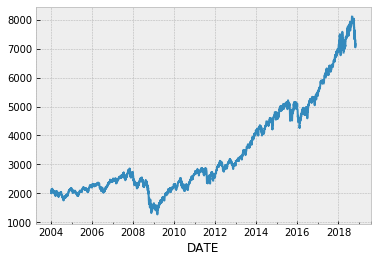

In [7]:
nasdaq = pdr.fred.FredReader('NASDAQCOM',start='1-1-2004').read()['NASDAQCOM']
nasdaq.plot()
nasdaq.index[-1]

In [8]:
#fill missing values by previous date
new_idxs = pd.date_range(nasdaq.index[0], nasdaq.index[-1])
nasdaq = nasdaq.reindex(new_idxs).ffill()

In [9]:
nasdaq[:6]

2004-01-01        NaN
2004-01-02    2006.68
2004-01-03    2006.68
2004-01-04    2006.68
2004-01-05    2047.36
2004-01-06    2057.37
Freq: D, Name: NASDAQCOM, dtype: float64

In [10]:
nasdaq.index[:6]

DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
               '2004-01-05', '2004-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
nasdaq.values[:6]

array([    nan, 2006.68, 2006.68, 2006.68, 2047.36, 2057.37])

In [12]:
nasdaq[nasdaq.index > '2005-02'][:4]

2005-02-02    2075.06
2005-02-03    2057.64
2005-02-04    2086.66
2005-02-05    2086.66
Freq: D, Name: NASDAQCOM, dtype: float64

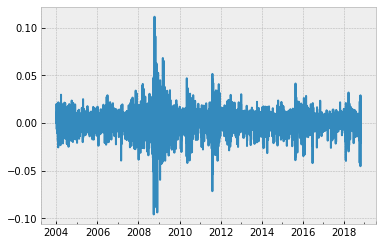

In [13]:
logrelative = np.log(nasdaq).diff()
logrelative.plot()

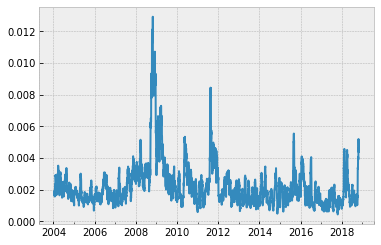

In [14]:
rolling_logrelative = logrelative.rolling(16)
volatility = rolling_logrelative.std()/4
volatility.plot()

![](computers.png)

Таблица Product представляет производителя (maker), номер модели (model) и тип ('PC' - ПК, 'Laptop' - ноутбук или 'Printer' - принтер). Предполагается, что номера моделей в таблице Product уникальны для всех производителей и типов продуктов. В таблице PC для каждого ПК, однозначно определяемого уникальным кодом – code, указаны модель – model (внешний ключ к таблице Product), скорость - speed (процессора в мегагерцах), объем памяти - ram (в мегабайтах), размер диска - hd (в гигабайтах), скорость считывающего устройства - cd (например, '4x') и цена - price. Таблица Laptop аналогична таблице РС за исключением того, что вместо скорости CD содержит размер экрана - screen (в дюймах). В таблице Printer для каждой модели принтера указывается, является ли он цветным - color ('y', если цветной), тип принтера - type (лазерный – 'Laser', струйный – 'Jet' или матричный – 'Matrix') и цена - price.

In [15]:
product = pd.read_csv('product.csv', index_col='model')
product.head()

,maker,type
model,,
1121,B,PC
1232,A,PC
1233,A,PC
1260,E,PC
1276,A,Printer


In [16]:
laptop = pd.read_csv('laptop.csv', index_col='code')
laptop.head()

,model,speed,ram,hd,price,screen
code,,,,,,
1,1298,350,32,4.0,700,11
2,1321,500,64,8.0,970,12
3,1750,750,128,12.0,1200,14
4,1298,600,64,10.0,1050,15
5,1752,750,128,10.0,1150,14


In [17]:
pc = pd.read_csv('pc.csv', index_col='code')
pc.head()

,model,speed,ram,hd,cd,price
code,,,,,,
1,1232,500,64,5.0,12x,600
2,1121,750,128,14.0,40x,850
3,1233,500,64,5.0,12x,600
4,1121,600,128,14.0,40x,850
5,1121,600,128,8.0,40x,850


In [18]:
printer = pd.read_csv('printer.csv', index_col='code')
printer.head()

,model,color,type,price
code,,,,
1,1276,n,Laser,400
2,1433,y,Jet,270
3,1434,y,Jet,290
4,1401,n,Matrix,150
5,1408,n,Matrix,270


### task 1
Для каждого производителя, выпускающего ноутбуки c объёмом жесткого диска не менее 10 Гбайт, найти скорости таких ноутбуков. Вывод: производитель, скорость. 

### sql

In [19]:
query = '''
    select
        product.maker, laptop.speed
    from product join laptop 
    on product.model = laptop.model and laptop.hd >= 10
    '''
ps.sqldf(query)

,maker,speed
0,B,750
1,A,600
2,A,750
3,A,450


### task 1
Для каждого производителя, выпускающего ноутбуки c объёмом жесткого диска не менее 10 Гбайт, найти скорости таких ПК-блокнотов. Вывод: производитель, скорость. 

### pandas

In [20]:
product_laptop = pd.merge(product, laptop, left_index=True, right_on='model')
product_laptop

,maker,type,model,speed,ram,hd,price,screen
code,,,,,,,,
1,A,Laptop,1298,350,32,4.0,700,11
4,A,Laptop,1298,600,64,10.0,1050,15
6,A,Laptop,1298,450,64,10.0,950,12
2,C,Laptop,1321,500,64,8.0,970,12
3,B,Laptop,1750,750,128,12.0,1200,14
5,A,Laptop,1752,750,128,10.0,1150,14


In [21]:
product_laptop.loc[product_laptop['hd'] >= 10, ['maker', 'speed']]

,maker,speed
code,,
4,A,600
6,A,450
3,B,750
5,A,750


### task 2

Найдите производителей, выпускающих по меньшей мере три различных модели ПК. Вывести: Maker, число моделей ПК.

### sql

In [22]:
query = '''
    select
        maker,
        count(model) as count
    from product
    where type = 'PC'
    group by maker
    having count >= 3
    '''
data = ps.sqldf(query)
data.set_index('maker')

,count
maker,
E,3


### task 2

Найдите производителей, выпускающих по меньшей мере три различных модели ПК. Вывести: Maker, число моделей ПК.

### pandas

In [23]:
maker = product[product['type']=='PC'].groupby('maker').count()
maker

,type
maker,
A,2
B,1
E,3


In [24]:
maker = maker[maker['type'] >= 3]
maker

,type
maker,
E,3


In [25]:
maker.rename(columns={'type':'pc_count'})

,pc_count
maker,
E,3


In [26]:
maker = product[product['type']=='PC'].groupby('maker').size()
maker

maker
A    2
B    1
E    3
dtype: int64

In [27]:
maker[maker >= 3]

maker
E    3
dtype: int64

### task 3
Найдите производителей самых дешевых цветных принтеров. Вывести: maker, price 

### sql

In [28]:
query = '''
    select
        maker,
        min(price) as price
    from product join printer
        on product.model = printer.model and printer.color = 'y'
'''
ps.sqldf(query)

,maker,price
0,D,270


### task 3
Найдите производителей самых дешевых цветных принтеров. Вывести: maker, price 

### pandas

In [29]:
data = product.loc[product['type']=='Printer', ['maker']].merge(
    printer.loc[printer['color']=='y', ['model', 'price']], left_index=True, right_on='model')
data

,maker,model,price
code,,,
2,D,1433,270
3,E,1434,290


In [30]:
data_min = data.min()
data_min

maker       D
model    1433
price     270
dtype: object

In [31]:
data_min[['maker', 'price']]

maker      D
price    270
dtype: object

### task 4
Найдите модели ноутбуков, скорость которых меньше скорости любого из ПК. Вывести: model, speed.

### sql

In [32]:
query = '''
    select
        distinct laptop.model,
        laptop.speed
    from laptop join pc
    on laptop.speed < (select min(pc.speed) from pc)
'''
ps.sqldf(query)

,model,speed
0,1298,350


### task 4
Найдите модели ПК-блокнотов, скорость которых меньше скорости любого из ПК. Вывести: model, speed.

### pandas

In [33]:
laptop.loc[laptop['speed'] < pc['speed'].min(), ['model', 'speed']]

,model,speed
code,,
1,1298,350


### task 5

Найдите пары моделей PC, имеющие одинаковые скорость и RAM. В результате каждая пара указывается только один раз, т.е. (i,j), но не (j,i), Порядок вывода: модель с большим номером, модель с меньшим номером, скорость и RAM.

### sql

In [34]:
query = '''
    select
        a.model,
        b.model,
        a.speed,
        a.ram
    from pc as a join pc as b
    on a.speed = b.speed and a.ram = b.ram and a.model > b.model
'''
ps.sqldf(query)

,model,model,speed,ram
0,1233,1232,500,64
1,1233,1121,750,128
2,1260,1232,500,32


### task 5

Найдите пары моделей PC, имеющих одинаковые скорость и RAM. В результате каждая пара указывается только один раз, т.е. (i,j), но не (j,i), Порядок вывода: модель с большим номером, модель с меньшим номером, скорость и RAM.

### pandas

In [35]:
data = pc.merge(pc, on=['speed','ram'])
data.iloc[:4]

,model_x,speed,ram,hd_x,cd_x,price_x,model_y,hd_y,cd_y,price_y
0,1232,500,64,5.0,12x,600,1232,5.0,12x,600
1,1232,500,64,5.0,12x,600,1233,5.0,12x,600
2,1233,500,64,5.0,12x,600,1232,5.0,12x,600
3,1233,500,64,5.0,12x,600,1233,5.0,12x,600


In [36]:
data.loc[data['model_x'] > data['model_y'],
         ['model_x', 'model_y', 'speed', 'ram']]

,model_x,model_y,speed,ram
2,1233,1232,500,64
6,1233,1121,750,128
14,1260,1232,500,32


### task 6

Найти производителей, которые выпускают более одной модели, при этом все выпускаемые производителем модели являются продуктами одного типа.
Вывести: maker, type 

### sql

In [37]:
query = '''
    select maker, type
    from product
    group by maker
    having count(distinct type) = 1 and count(model) > 1
'''
ps.sqldf(query)

,maker,type
0,D,Printer


### task 6

Найти производителей, которые выпускают более одной модели, при этом все выпускаемые производителем модели являются продуктами одного типа.
Вывести: maker, type 

### pandas

In [38]:
more_one = product.groupby(['maker']).size() > 1
more_one

maker
A     True
B     True
C    False
D     True
E     True
dtype: bool

In [39]:
unique = product.groupby('maker')['type'].nunique() == 1
unique

maker
A    False
B    False
C     True
D     True
E    False
Name: type, dtype: bool

In [40]:
good_makers = more_one & unique
good_makers

maker
A    False
B    False
C    False
D     True
E    False
dtype: bool

In [41]:
good_makers[good_makers]

maker
D    True
dtype: bool

In [42]:
good_makers[good_makers].index

Index(['D'], dtype='object', name='maker')

In [43]:
product['maker'].isin(good_makers[good_makers].index)

model
1121    False
1232    False
1233    False
1260    False
1276    False
1288     True
1298    False
1321    False
1401    False
1408    False
1433     True
1434    False
1750    False
1752    False
2113    False
2112    False
Name: maker, dtype: bool

In [44]:
product[product['maker'].isin(good_makers[good_makers].index)].drop_duplicates()

,maker,type
model,,
1288,D,Printer


In [45]:
more_one = product.groupby(['maker']).size() > 1
unique = product.groupby('maker')['type'].nunique() == 1
good_makers = more_one & unique
product[product['maker'].isin(good_makers[good_makers].index)].drop_duplicates()

,maker,type
model,,
1288,D,Printer


### task 7
Найдите производителей, которые производили бы как ПК
со скоростью не менее 750 МГц, так и ноутбуки со скоростью не менее 750 МГц.
Вывести: Maker 
### sql

In [46]:
query = '''
    select distinct maker
    from product join pc join laptop
    on product.model = pc.model or product.model = laptop.model
    where pc.speed >= 750 and laptop.speed >= 750
'''
ps.sqldf(query)

,maker
0,B
1,A


### task 7
Найдите производителей, которые производили бы как ПК
со скоростью не менее 750 МГц, так и ноутбуки со скоростью не менее 750 МГц.
Вывести: Maker 
### pandas

In [47]:
x = product.merge(pc[pc['speed'] >= 750],
    left_index=True, right_on='model')
x

,maker,type,model,speed,ram,hd,cd,price
code,,,,,,,,
2,B,PC,1121,750,128,14.0,40x,850
6,A,PC,1233,750,128,20.0,50x,950
11,A,PC,1233,900,128,40.0,40x,980
12,A,PC,1233,800,128,20.0,50x,970


In [48]:
y = product.merge(laptop[laptop['speed'] >= 750],
    left_index=True, right_on='model')
y

,maker,type,model,speed,ram,hd,price,screen
code,,,,,,,,
3,B,Laptop,1750,750,128,12.0,1200,14
5,A,Laptop,1752,750,128,10.0,1150,14


In [49]:
x[['maker']].merge(y[['maker']]).groupby('maker').count()

""
maker
A
B


In [50]:
x = product.merge(pc[pc['speed'] >= 750],
    left_index=True, right_on='model')['maker']
x

code
2     B
6     A
11    A
12    A
Name: maker, dtype: object

In [51]:
y = product.merge(laptop[laptop['speed'] >= 750],
    left_index=True, right_on='model')['maker']
y

code
3    B
5    A
Name: maker, dtype: object

In [52]:
set(x)&set(y)

{'A', 'B'}

### task 8

Задача по предсказанию, сколько потратит клиент в свой первый визит на следующей неделе.

### pandas

In [53]:
# load data
train = pd.read_csv('data.csv')
train[4:8]

,id,date,sum
4,1,15,8
5,1,17,6
6,1,23,2
7,1,24,7


In [54]:
# weights by date for weighted mode 
train['weights'] = (train['date'] / train['date'].max()) ** 1.2
train[4:8]

,id,date,sum,weights
4,1,15,8,0.017440
5,1,17,6,0.020266
6,1,23,2,0.029128
7,1,24,7,0.030654


In [55]:
#group by sum over weights
byw = train.groupby(['id', 'sum'])[['weights']].sum()
byw.loc[1:1]

weights
id sum           
1  1    26.984579
   2    14.208423
   3     5.630956
   4     5.456149
   5    11.246348
   6    15.971761
   7    18.317880
   8     5.361063

In [56]:
#find max weighted sum index
ind = byw.reset_index().groupby('id')['weights'].idxmax()
ind[:4]

id
1     0
2    11
3    16
4    24
Name: weights, dtype: int64

In [57]:
#retrieve max weighted sum
prediction = byw.iloc[ind].reset_index('sum')
prediction[:4]

,sum,weights
id,,
1,1,26.984579
2,4,19.809903
3,5,10.248162
4,6,13.086052


In [58]:
# calculate delta in visits
train['delta_day'] = train['date'].diff()
train[:4]

,id,date,sum,weights,delta_day
0,1,2,6,0.001554,NaN
1,1,3,7,0.002528,1.0
2,1,8,5,0.008202,5.0
3,1,10,7,0.010721,2.0


In [59]:
# calculate mean day between visits
prediction['delta_day'] = train.groupby('id')['delta_day'].mean()
prediction[:4]

,sum,weights,delta_day
id,,,
1,1,26.984579,2.164179
2,4,19.809903,-0.040650
3,5,10.248162,-1.520833
4,6,13.086052,0.905882


In [60]:
# calculate last day of visit
prediction['last_day'] = train.groupby('id').tail(1).reset_index().set_index('id')['date']
prediction[:4]

,sum,weights,delta_day,last_day
id,,,,
1,1,26.984579,2.164179,437
2,4,19.809903,-0.040650,432
3,5,10.248162,-1.520833,359
4,6,13.086052,0.905882,436


In [61]:
# parameters
f_delta = -4
f_minus = -7
f_plus = 7
last_day = 438

# filter: long time without visits
# filter: estimated visit before our week
# filter: estimated visit after our week
def make_zero(row):
    if ((row['last_day'] - last_day < f_minus) 
            or (row['last_day'] + row['delta_day'] - last_day < f_delta)
            or (row['last_day'] + row['delta_day'] - last_day > f_plus)):
        return 0
    else:
        return row['sum']

prediction['sum'] = prediction.apply(make_zero, axis=1)
prediction[:4]

,sum,weights,delta_day,last_day
id,,,,
1,1.0,26.984579,2.164179,437
2,0.0,19.809903,-0.040650,432
3,0.0,10.248162,-1.520833,359
4,6.0,13.086052,0.905882,436


In [62]:
# saving
prediction[['sum']].to_csv('submit.csv')